In [35]:
import os


EPOCHS = 100
BATCH_SIZE = 8
ARCH = "flor"

IMG_SIZE = (128,32, 1)
DATA_ROOT_PATH = "..\\data"
IMAGES_PATH = os.path.join(DATA_ROOT_PATH, "images", "data")
IMAGES_PATH

'..\\data\\images\\data'

In [19]:
vocab = None

with open(os.path.join(DATA_ROOT_PATH, "hindi_vocab.txt"),encoding="utf-8") as f:
  vocab = f.readlines()

idx_to_vocab = {i:value.strip() for i, value in enumerate(vocab)}
vocab_to_idx = {value:key for key, value in idx_to_vocab.items()}

In [20]:
train_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_train.txt"), encoding="utf-8") as f:
  train_data = f.readlines()

In [21]:
valid_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_val.txt"), encoding="utf-8") as f:
  valid_data = f.readlines()

In [22]:
test_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_val.txt"), encoding="utf-8") as f:
  test_data = f.readlines()

In [23]:
test_data1 = None

with open(os.path.join(DATA_ROOT_PATH, "test.txt"), encoding="utf-8") as f:
  test_data1 = f.readlines()

In [24]:
charl = None

with open( "charList.txt", encoding="utf-8") as f:
  charl = f.readlines()

In [25]:
charl=charl[0]

In [26]:
len(charl)

109

In [27]:
len(train_data)

69803

In [28]:
len(valid_data)

12713

In [17]:
len(test_data1)

12865

In [12]:
len(test_data1)

TypeError: object of type 'NoneType' has no len()

In [9]:
d=idx_to_vocab[3870]

In [10]:
d

'प्रत्यक्षदर्शी'

In [11]:
a=""
for i in d:
    a=a+i

In [12]:
a

'प्रत्यक्षदर्शी'

In [10]:
len(vocab)

11031

In [10]:
m=0
for i in range(len(vocab)):
    s=idx_to_vocab[i]
    m=max(m,len(s))
m

27

In [11]:
len(train_data)

69803

In [12]:
len(d)

NameError: name 'd' is not defined

In [13]:
d=[]
path_to_label={}
for i in range(len(train_data)):
    label=train_data[i].split()
    curr_img_path = label[0]
    curr_img_path = "\\".join(curr_img_path.split("/")[2:])
    curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
    if os.path.exists(curr_img_path):
        d.append(curr_img_path)
        path_to_label[curr_img_path]=int(label[1])

# train data labels

In [13]:
train_data_labels=[]
for i in range(len(train_data)):
    z=[]
    for j in range(27):
        z.append(0)
    
    label=train_data[i].split()
    curr_img_path = label[0]
    curr_img_path = "\\".join(curr_img_path.split("/")[2:])
    curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
    if os.path.exists(curr_img_path):
        label=idx_to_vocab[int(label[1])]
        for k in range(len(label)):
            for r in range(len(charl)):
                if label[k]==charl[r]:
                    z[k]=r
        train_data_labels.append(z)

In [24]:
len(train_data_labels)

NameError: name 'train_data_labels' is not defined

In [36]:
curr_data = train_data[0].split()
curr_img_path = curr_data[0]


curr_img_path = "/".join(curr_img_path.split("/")[2:])
curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
curr_img = pp.preprocess(curr_img_path, IMG_SIZE)

In [38]:
curr=np.transpose(curr_img, (1, 0))

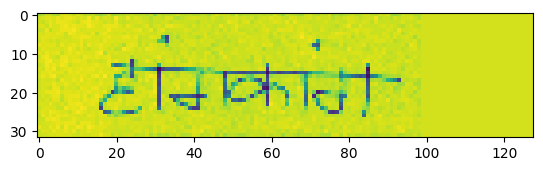

In [39]:
plt.imshow(curr)

In [42]:
train_data_labels[0]

[57,
 60,
 3,
 23,
 21,
 60,
 3,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# train data generation

In [ ]:
curr_img_path = curr_data[0]
curr_label = vocab_to_idx[curr_data[1]]

curr_img_path = "\\".join(curr_img_path.split("/")[2:])
curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

In [29]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
def skew_c(input_file):
    img = im.open(input_file)
    # convert to binary
    wd, ht = img.size
    pix = np.array(img.convert('1').getdata(), np.uint8)
    bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
    plt.imshow(bin_img, cmap='gray')
    #plt.savefig('binary.png')
    delta = 1
    limit = 5
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
        hist, score = find_score(bin_img, angle)
        scores.append(score)
    best_score = max(scores)
    best_angle = angles[scores.index(best_score)]
    #print('Best angle: {}'.formate(best_angle))
    # correct skew
    data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
    img = im.fromarray((255 * data).astype("uint8")).convert("RGB")
    return img

In [30]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp

In [ ]:
t_data=[]
for i in range(len(train_data)):
    curr_data=train_data[i].split()
    curr_img_path = curr_data[0]
    curr_img_path = "\\".join(curr_img_path.split("/")[2:])
    curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
    if os.path.exists(curr_img_path):
        curr_img=skew_c(curr_img_path)
        curr_img = ImageOps.grayscale(curr_img)
        curr_img = pp.preprocess(curr_img_path,IMG_SIZE )
        t_data.append(curr_img)

C:\Users\pavan\AppData\Local\Temp\ipykernel_16052\567187823.py:8: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)
C:\Users\pavan\AppData\Local\Temp\ipykernel_16052\567187823.py:31: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(bin_img, best_angle, reshape=False, order=0)


In [13]:
#not needed
##label generator
def label_g(l):
    label=idx_to_vocab[l]
    z=[]
    for j in range(27):
        z.append(0)
    for k in range(len(label)):
        for r in range(len(charl)):
            if label[k]==charl[r]:
                z[k]=r
    return z   

In [53]:
#not needed
def preprocess1(curr_img_path):
    img=tf.io.read_file(curr_img_path)
    path=os.path.abspath(img)
    print(path)
    curr_img=skew_c(img)
    curr_img = ImageOps.grayscale(curr_img)
    curr_img = pp.preprocess(curr_img_path,IMG_SIZE )
    plt.imshow(curr_img, cmap='gray')
    
    #label=label_g(path_to_label[curr_img_path])
    return curr_img

In [7]:
s=np.zeros((8, 27))
s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp

class DataGen(tf.keras.utils.Sequence):
    def __init__(self, data, img_size, batch_size, mode="TRAIN"):
        self.data = data
        self.img_size = img_size
        self.batch_size = batch_size
        self.mode = mode
        
    def __getitem__(self, i):
        start = i * self.batch_size
        end = (i+1) * self.batch_size
        
        batch_images = np.zeros((self.batch_size, self.img_size[0], self.img_size[1], 1))
        batch_labels = np.zeros((self.batch_size, 27))
        #batch_labels =[[],[],[],[],[],[],[],[]]
        
        for ii, df_index in enumerate(range(start, end)):
            curr_data = self.data[ii].split()
            curr_img_path = curr_data[0]
            #curr_label = idx_to_vocab[int(curr_data[1])]
            curr_label = label_g(int(curr_data[1]))

            curr_img_path = "/".join(curr_img_path.split("/")[2:])
            curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

            curr_img = Image.open(curr_img_path)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            curr_img = skew_c(curr_img_path)
            curr_img = ImageOps.grayscale(curr_img)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #delta_width = self.img_size[1] - curr_img.width
            #delta_height = self.img_size[0] - curr_img.height
            #pad_width = delta_width // 2
            #pad_height = delta_height // 2
            #padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
            #curr_img = ImageOps.expand(curr_img, padding)
            
            curr_img = img_to_array(curr_img)
            img_shape = curr_img.shape
            #curr_img = pp.preprocess(curr_img_path, self.img_size)
            curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            curr_img = curr_img.numpy().reshape((self.img_size[0], self.img_size[1],1))
            batch_images[ii, :, :] = curr_img / 255.
            batch_labels[ii,:] = curr_label
                    
        if self.mode == "TRAIN":
          return batch_images, batch_labels
        else:
          return batch_images
        
    def __len__(self):
      return len(self.data) // self.batch_size

In [15]:
train_datagen = DataGen(train_data, IMG_SIZE, 8)

In [16]:

train_datagen

# model


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.constraints import MaxNorm

from network.layers import FullGatedConv2D, GatedConv2D, OctConv2D
from tensorflow.keras.layers import Conv2D, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, PReLU
from tensorflow.keras.layers import Input, Add, Activation, Lambda, MaxPooling2D, Reshape

In [19]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=ARCH,
                 input_size=IMG_SIZE,
                 vocab_size=110,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15,
                 reduce_factor=0.1)

model.compile(learning_rate=0.001)

In [ ]:
h = model.fit(x=train_datagen,
              epochs=EPOCHS,
              verbose=1)

C:\Users\pavan\AppData\Local\Temp\ipykernel_23232\567187823.py:8: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)
C:\Users\pavan\AppData\Local\Temp\ipykernel_23232\567187823.py:31: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(bin_img, best_angle, reshape=False, order=0)


Epoch 1/100
1130/8725 [==>...........................] - ETA: 9:46:09 - loss: 2.7508

In [99]:

curr_img1.shape

(1, 128, 1024, 1)

In [85]:
curr_img1 = np.expand_dims(curr_img, 0)

In [100]:
model.predict(curr_img1)

([array([[61, 60]])], [array([0.87180746], dtype=float32)])

In [102]:
charl[60]

'ा'

In [ ]:
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

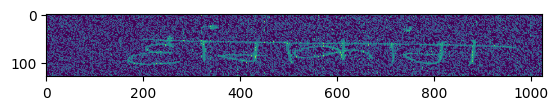

In [72]:
plt.imshow(curr_img)

In [76]:
curr_img

array([[[  0.],
        [  0.],
        [  0.],
        ...,
        [255.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [255.]],

       ...,

       [[  0.],
        [255.],
        [  0.],
        ...,
        [255.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [255.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [255.]]], dtype=float32)

C:\Users\pavan\AppData\Local\Temp\ipykernel_22744\567187823.py:8: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)
C:\Users\pavan\AppData\Local\Temp\ipykernel_22744\567187823.py:31: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(bin_img, best_angle, reshape=False, order=0)


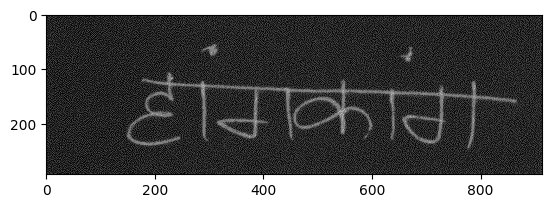

In [71]:
curr_data = train_data[o].split()
curr_img_path = curr_data[0]


curr_img_path = "/".join(curr_img_path.split("/")[2:])
curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

curr_img = Image.open(curr_img_path)
#curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
curr_img = skew_c(curr_img_path)
curr_img = ImageOps.grayscale(curr_img)

curr_img = img_to_array(curr_img)
img_shape = curr_img.shape
curr_img = tf.image.resize(curr_img, (IMG_SIZE[0], IMG_SIZE[1]), method="nearest")
curr_img = curr_img.numpy().reshape((IMG_SIZE[0], IMG_SIZE[1],1))

In [19]:
from keras.models import Sequential

In [42]:

model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer="he_uniform",input_shape=(1024, 128, 1)))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(Conv2D(filters=40, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=40, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2])))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=48, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=48, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2])))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=56, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=56, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2])))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2), padding="valid"))
shape = model.output_shape
model.add(Reshape((shape[1], shape[2] * shape[3])))
model.add(Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5)))
model.add(Dense(units=256))
model.add(Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5)))
model.add( Dense(units=110+1, activation="softmax"))




In [39]:
model.output_shape

(None, 128, 2, 64)

In [21]:

def flor(input_size, d_model):
    """
    Gated Convolucional Recurrent Neural Network by Flor et al.
    """

    input_data = Input(name="input", shape=input_size)

    cnn = Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer="he_uniform")(input_data)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=16, kernel_size=(3, 3), padding="same")(cnn)

    cnn = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=32, kernel_size=(3, 3), padding="same")(cnn)

    cnn = Conv2D(filters=40, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=40, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2]))(cnn)
    cnn = Dropout(rate=0.2)(cnn)

    cnn = Conv2D(filters=48, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=48, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2]))(cnn)
    cnn = Dropout(rate=0.2)(cnn)

    cnn = Conv2D(filters=56, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=56, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2]))(cnn)
    cnn = Dropout(rate=0.2)(cnn)

    cnn = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)

    cnn = MaxPooling2D(pool_size=(1, 2), strides=(1, 2), padding="valid")(cnn)

    shape = cnn.get_shape()
    bgru = Reshape((shape[1], shape[2] * shape[3]))(cnn)

    bgru = Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5))(bgru)
    bgru = Dense(units=256)(bgru)

    bgru = Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5))(bgru)
    output_data = Dense(units=d_model+1, activation="softmax")(bgru)

    return (input_data, output_data)

In [22]:
model=flor(IMG_SIZE,110)

In [43]:
model

In [ ]:
model=sequential

In [25]:
model.compile(loss=ctc_loss_lambda_func)

C:\Users\pavan\AppData\Local\Temp\ipykernel_22744\567187823.py:8: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)
C:\Users\pavan\AppData\Local\Temp\ipykernel_22744\567187823.py:31: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(bin_img, best_angle, reshape=False, order=0)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\losses.py", line 2663, in get
        return deserialize(identifier)
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "C:\Users\pavan\anaconda3\envs\pavan\lib\site-packages\keras\saving\legacy\serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'ctc'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


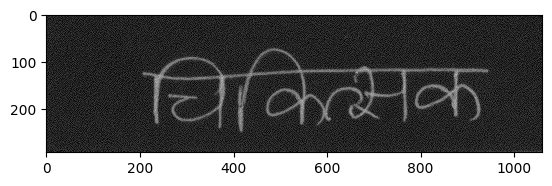

In [26]:
model.fit(train_datagen, epochs=10, batch_size=8)

In [33]:
#not needed
ctc_l=tf.nn.ctc_loss(
    tf.zeros((16,50),),
    sequence_length,
    preprocess_collapse_repeated=False,
    ctc_merge_repeated=True,
    ignore_longer_outputs_than_inputs=False,
    time_major=True
)

NameError: name 'sequence_length' is not defined

In [34]:
#not needed
lossc=tf.nn.ctc_loss()

TypeError: Missing required positional argument